# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 17.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 33.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 42.2MB/s]


In [5]:
data = pd.read_csv('./train.csv')

In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
813,72,64.70,4746.05,Male,0,Yes,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0
5223,28,70.40,1992.2,Female,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,One year,Yes,Bank transfer (automatic),0
1878,17,25.10,382.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),0
201,3,107.95,318.6,Male,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
4883,18,19.35,309.25,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


In [8]:
data.isna().sum() # нет пропущенных данных

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

<ipython-input-24-9317034948f2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)  # Заполнение NaN медианой


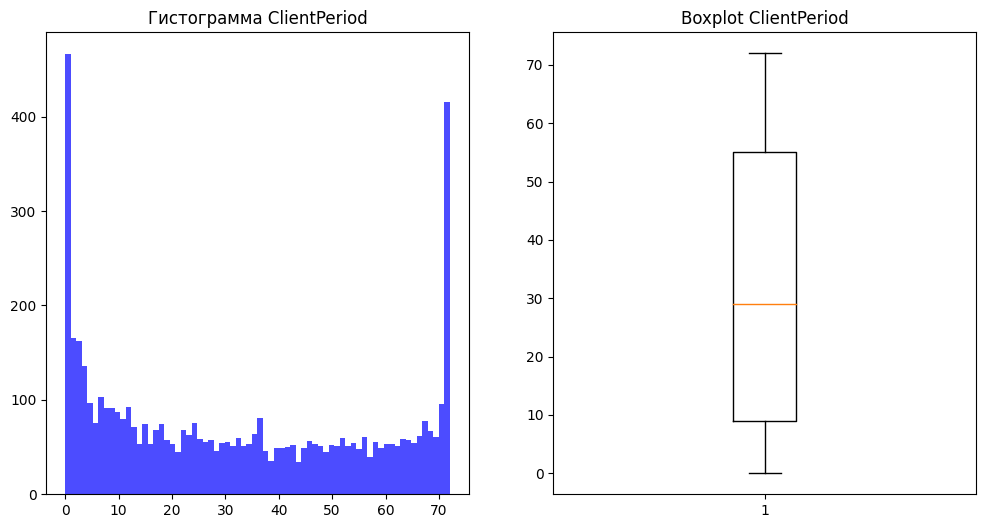

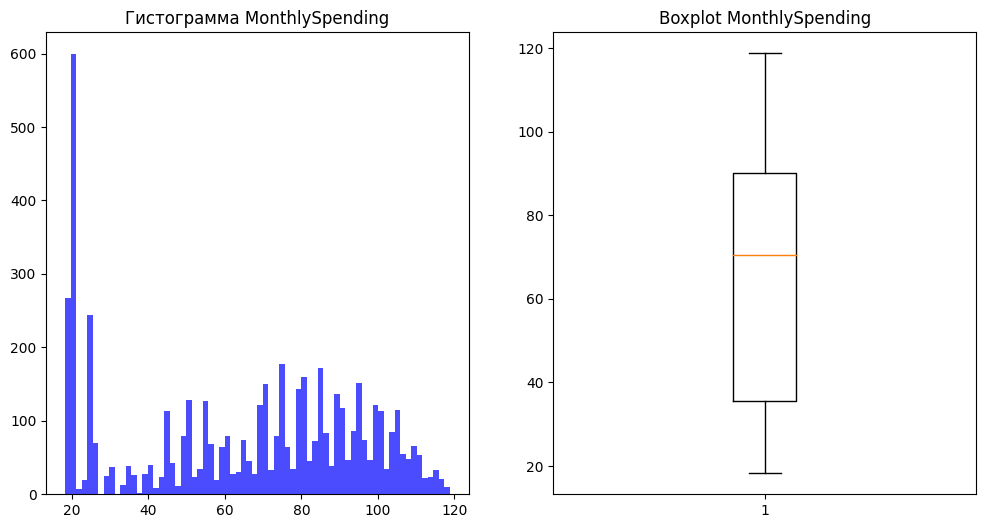

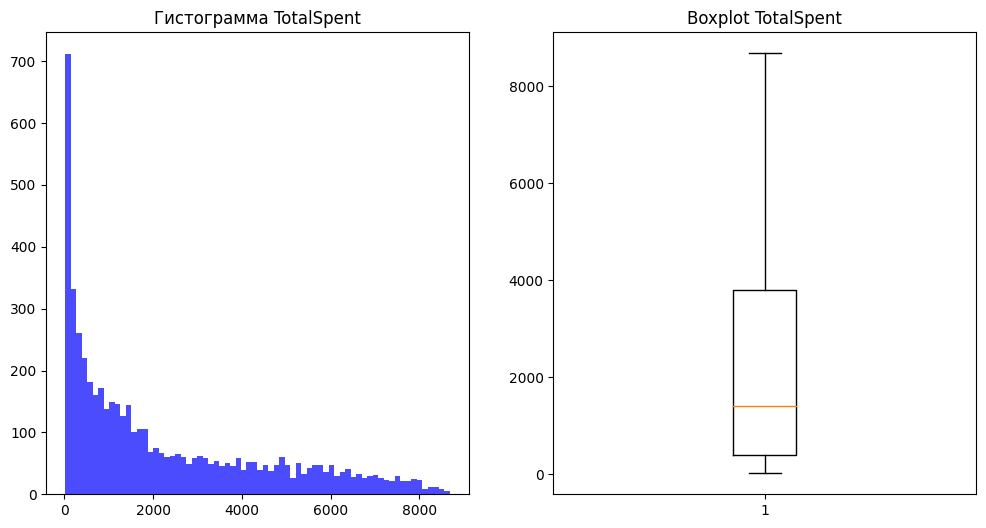

In [24]:
# 1. Построение гистограмм и boxplot для числовых признаков

# Преобразование числовых колонок к числовому типу (для предотвращения ошибок)
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Преобразование к числовому типу, если не числовое значение, то NaN
    median_value = data[col].median()  # Вычисление медианы для каждого столбца
    data[col].fillna(median_value, inplace=True)  # Заполнение NaN медианой

for col in num_cols:
    plt.figure(figsize=(12, 6))

    # Гистограмма
    plt.subplot(1, 2, 1)
    plt.hist(data[col], bins=70, color='blue', alpha=0.7)
    plt.title(f'Гистограмма {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(data[col])
    plt.title(f'Boxplot {col}')

    plt.show()

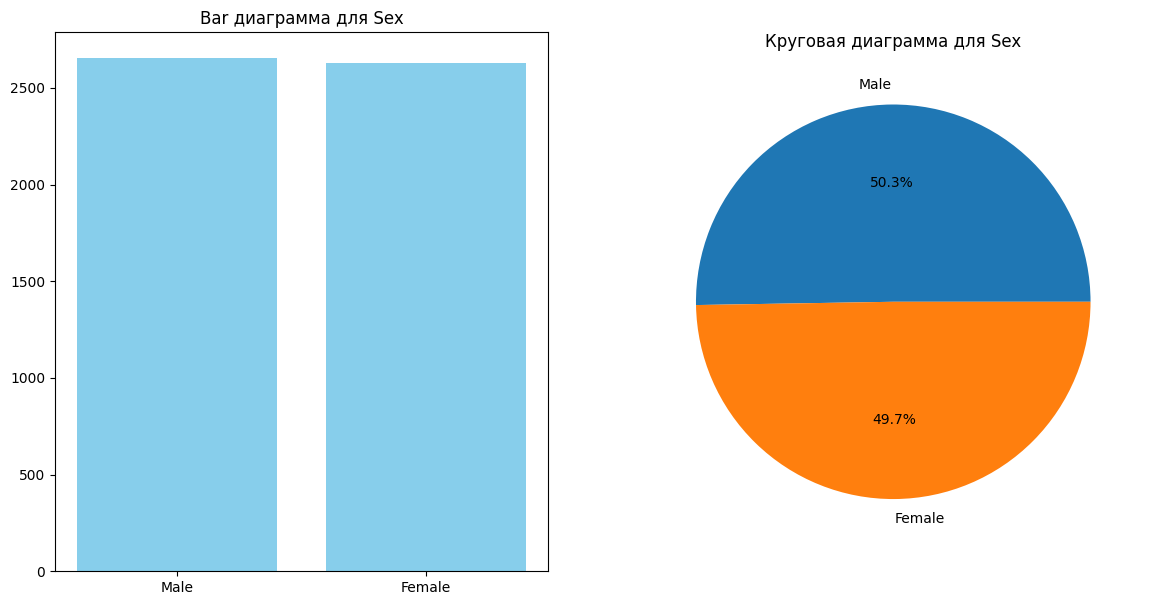

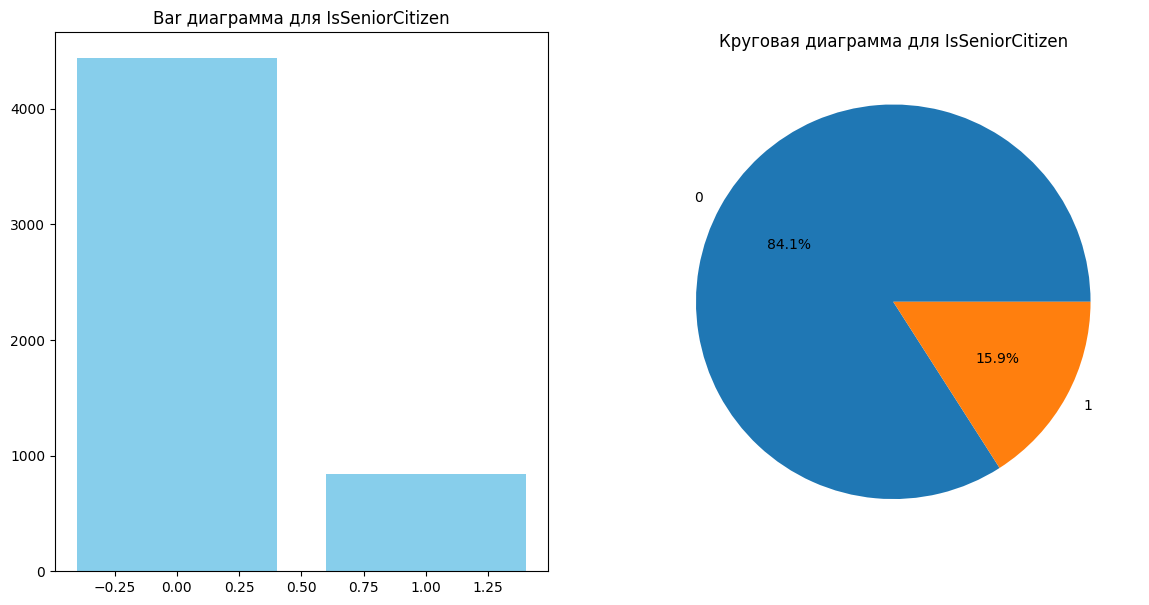

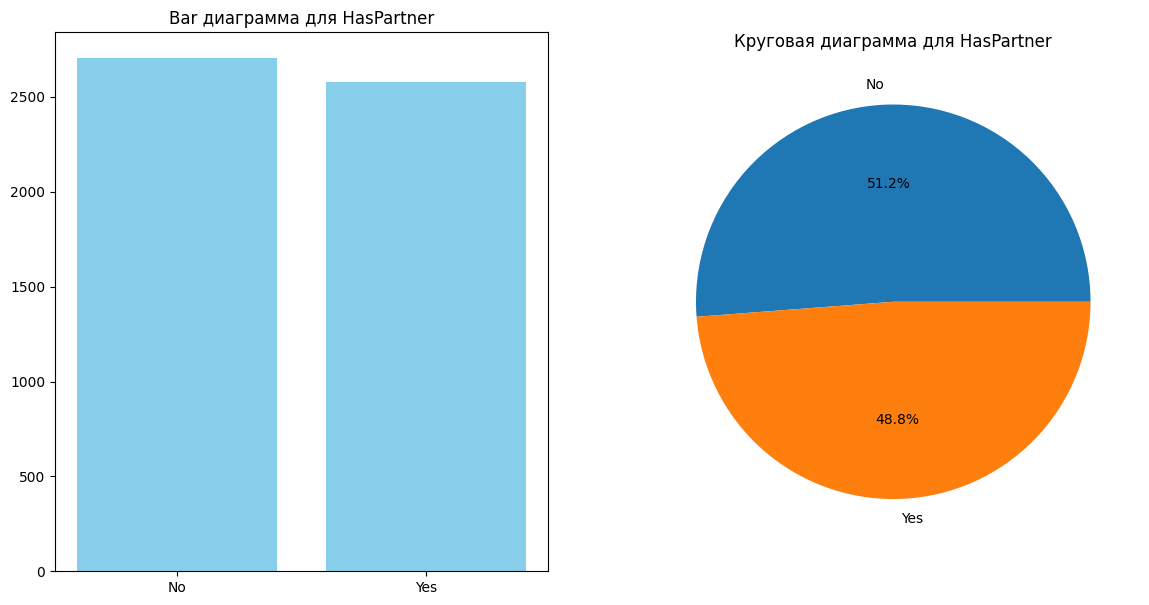

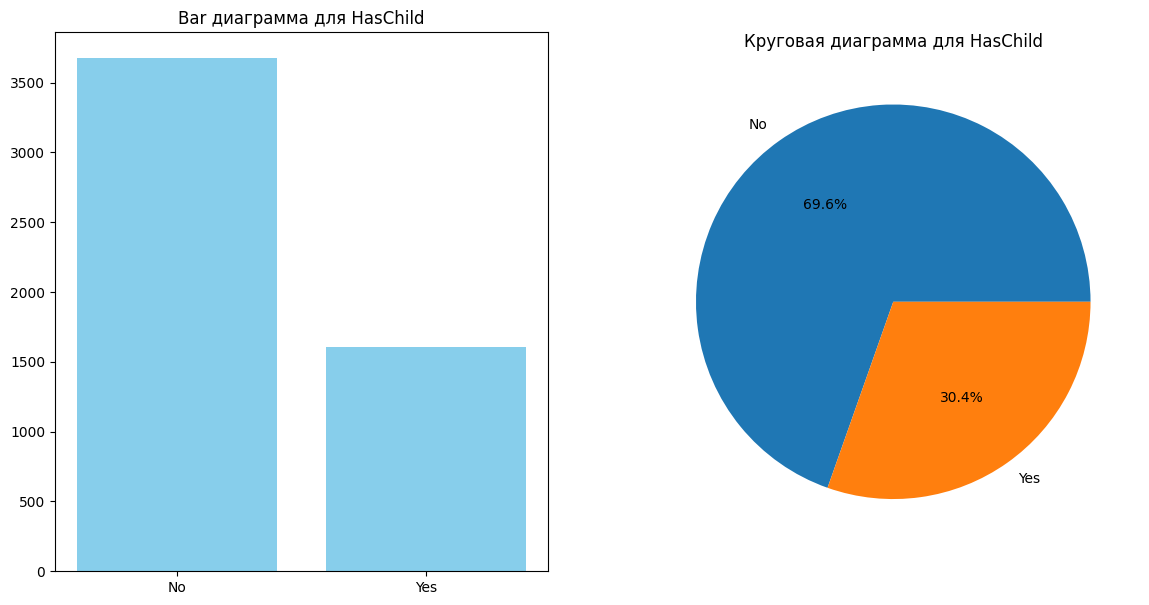

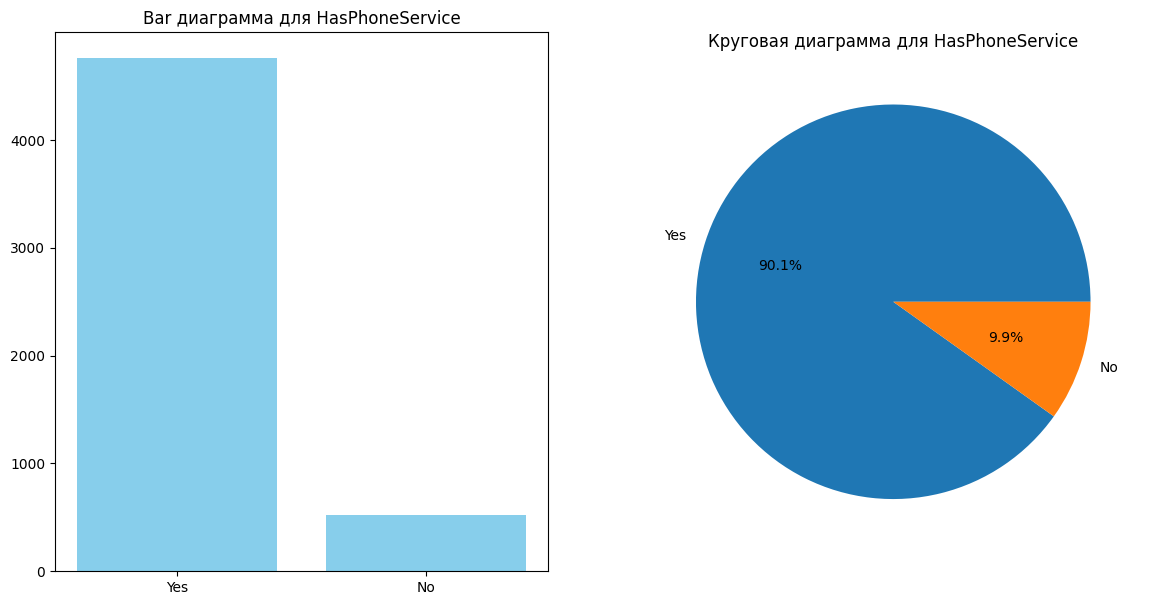

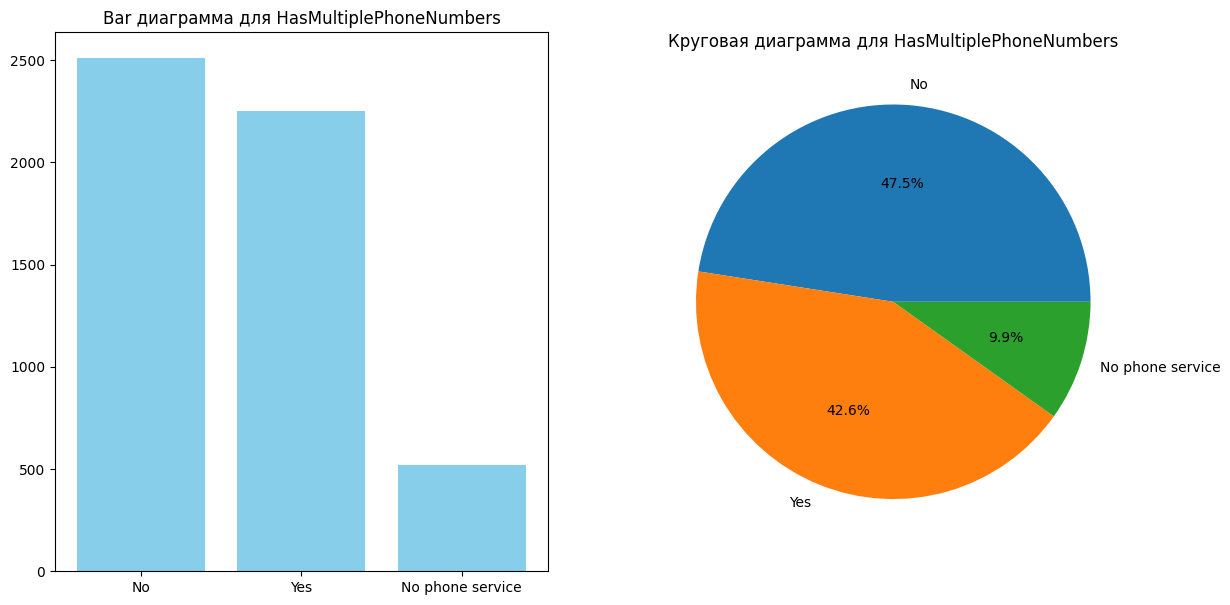

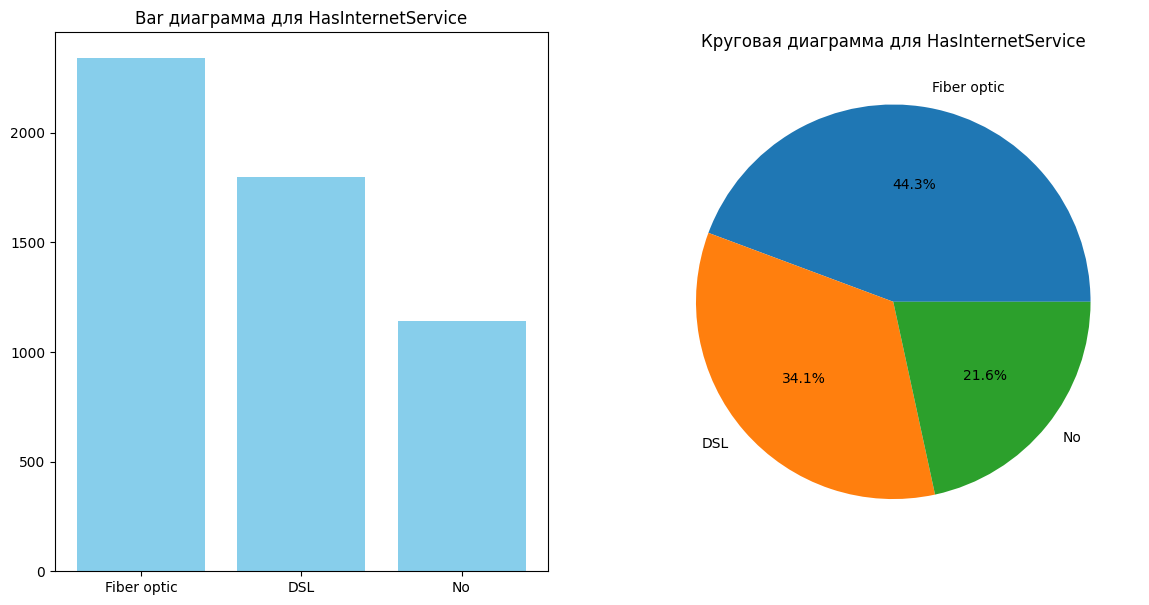

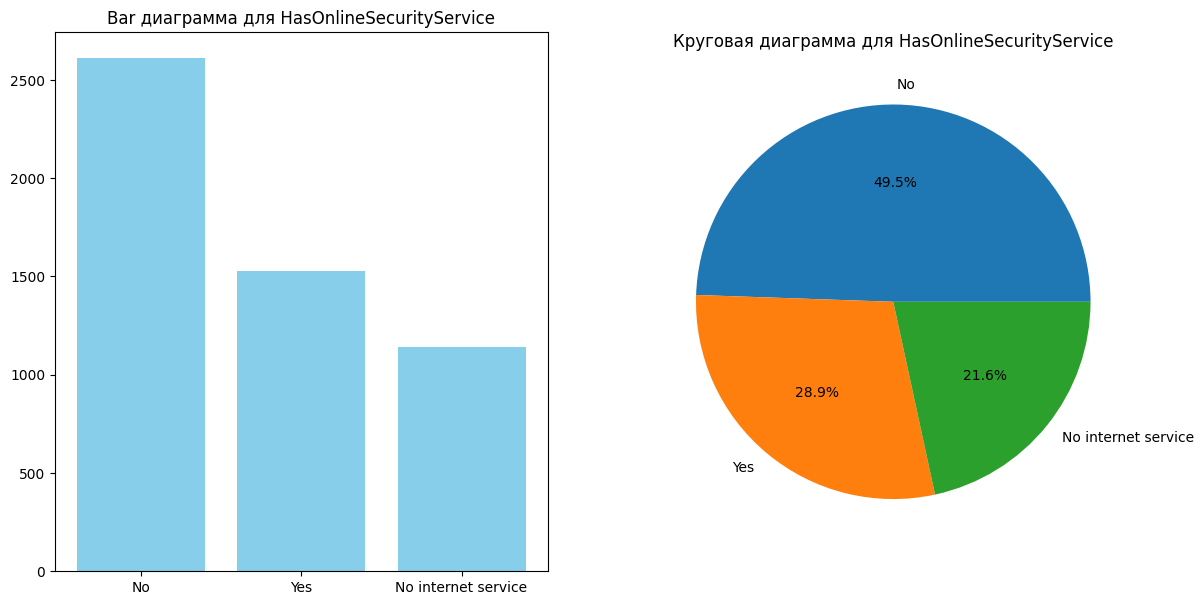

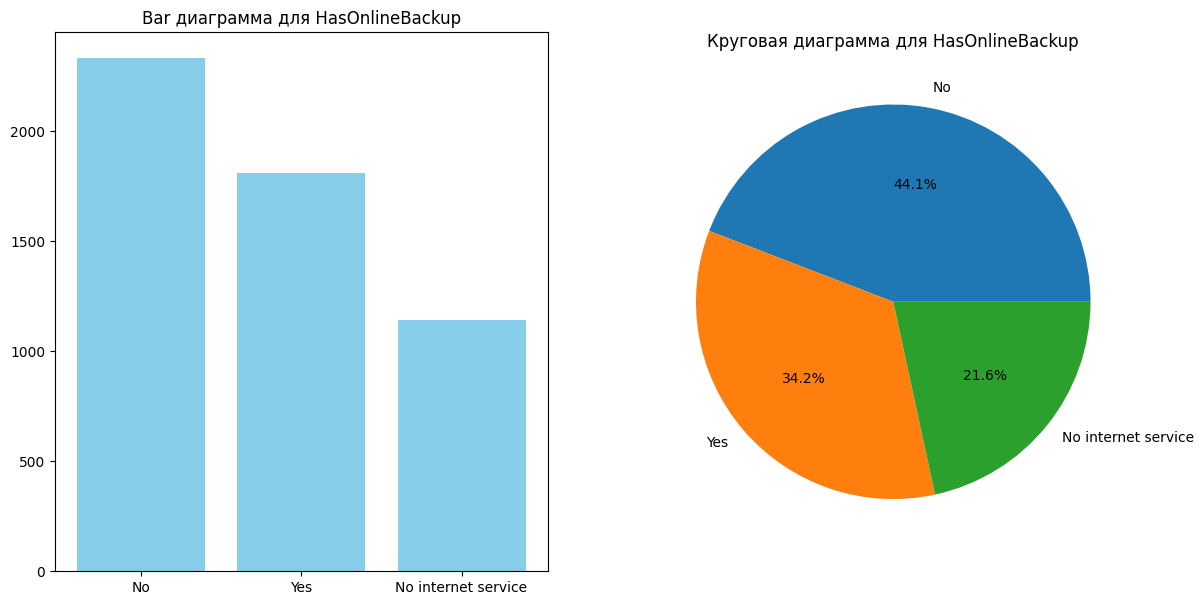

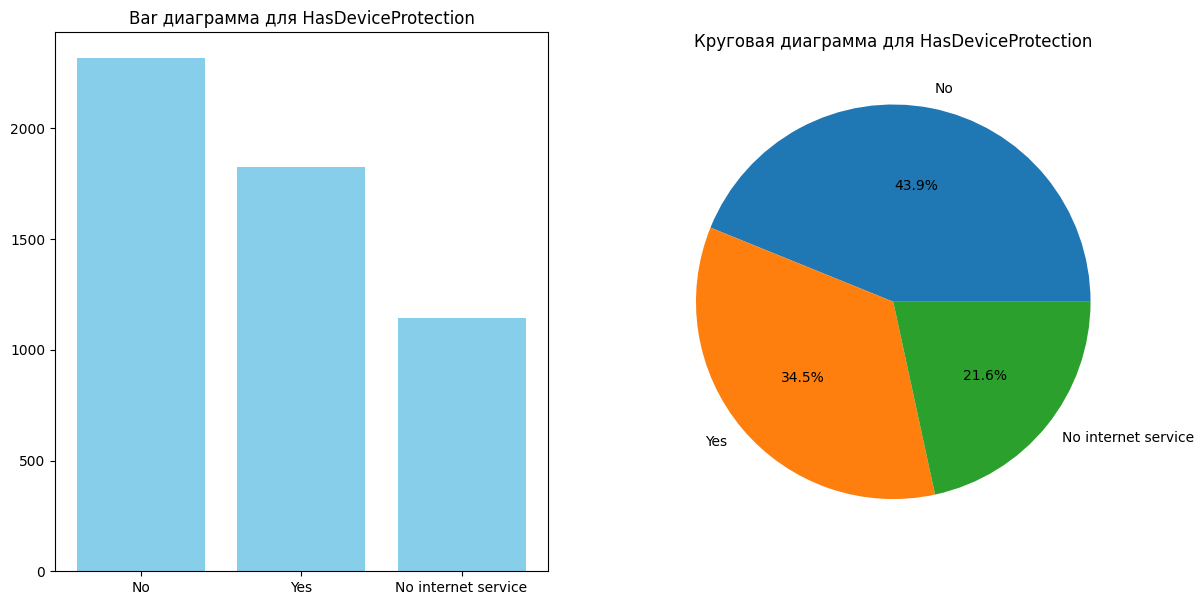

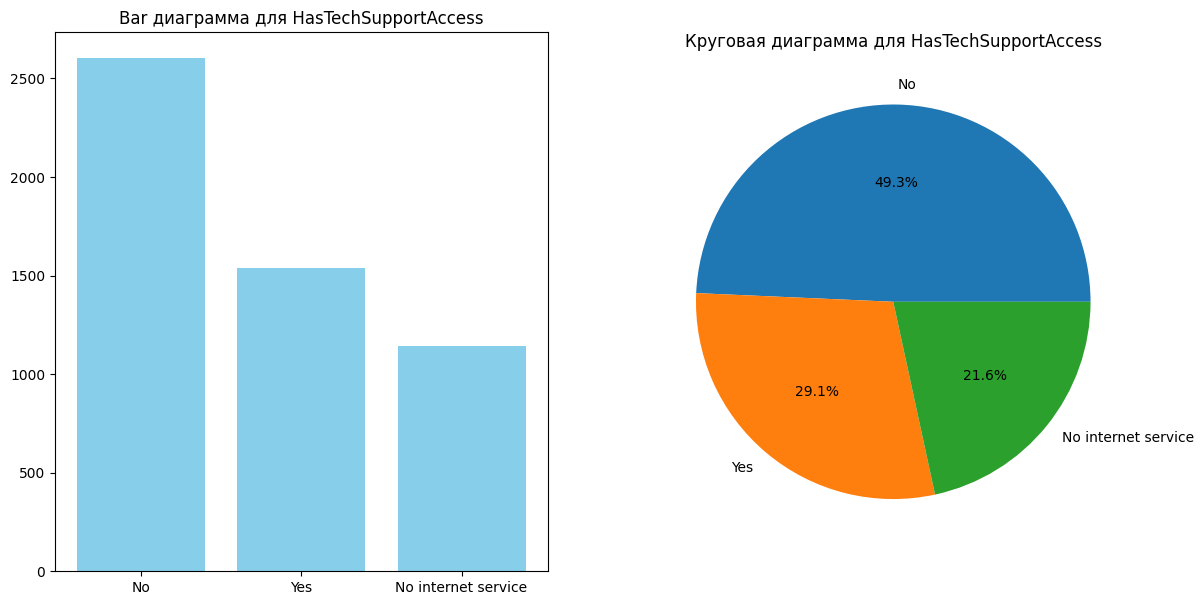

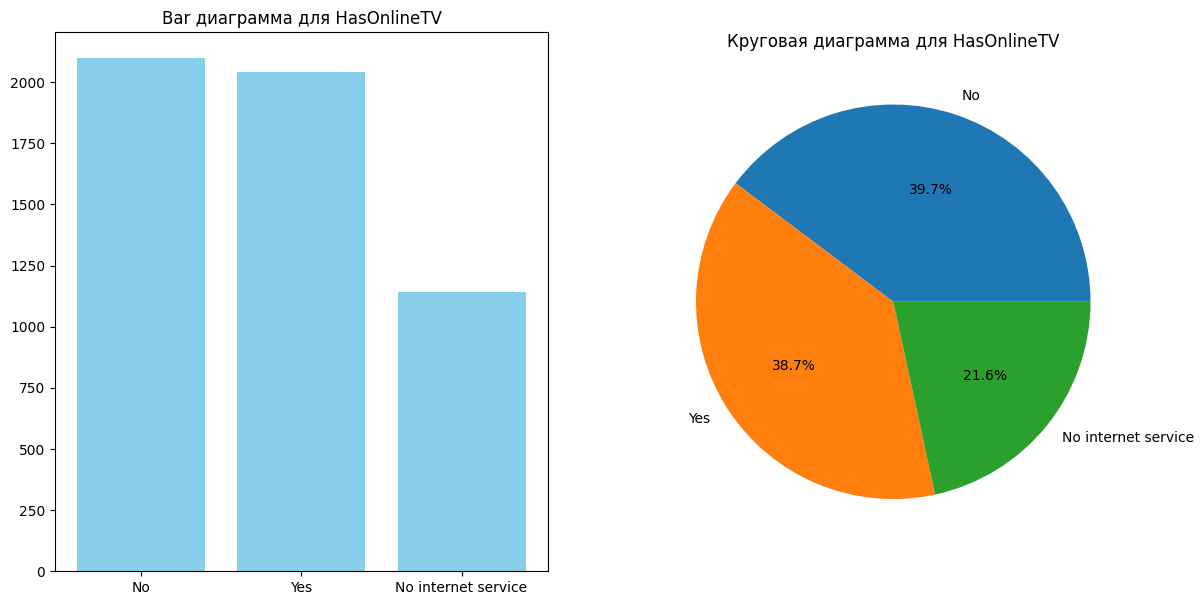

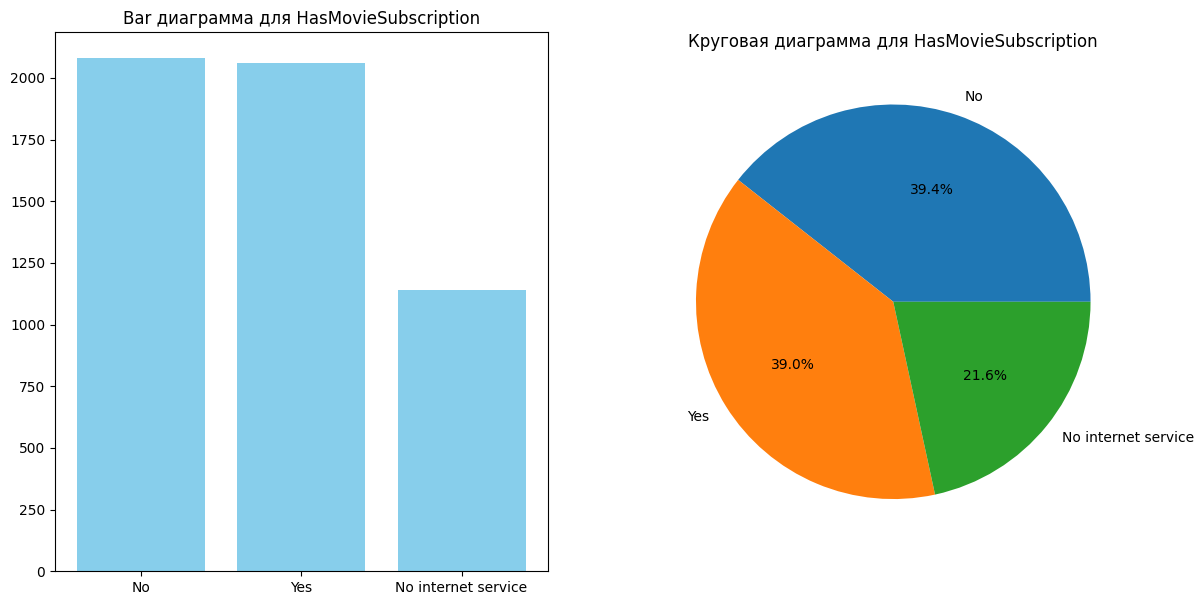

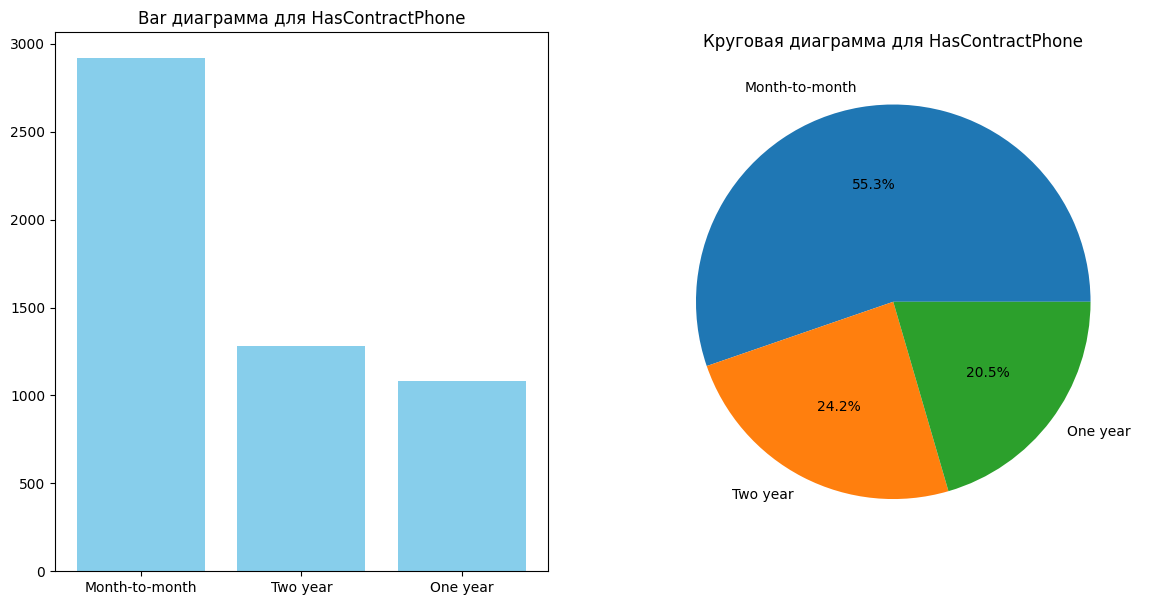

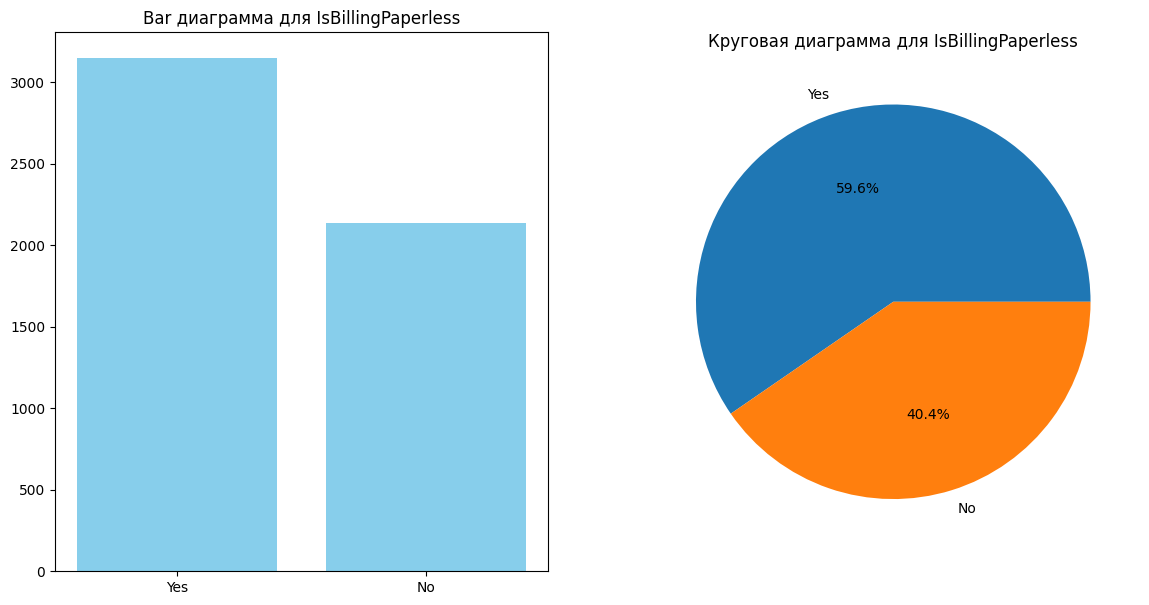

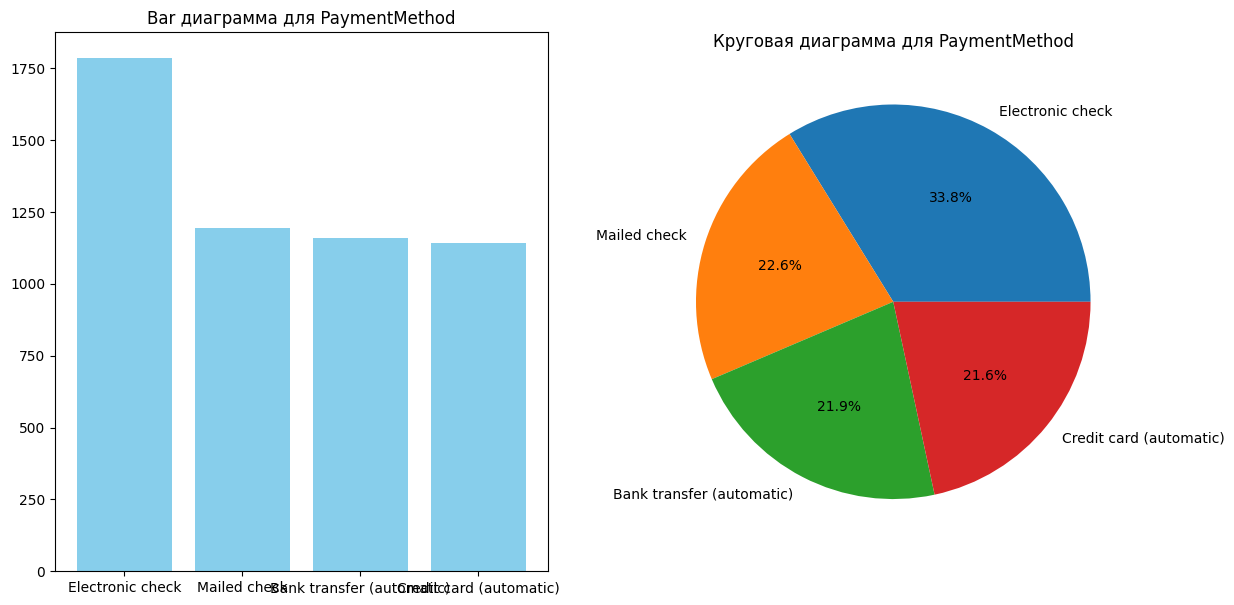

In [22]:
# 2. Построение диаграмм для категориальных признаков
for col in cat_cols:
    counts = data[col].value_counts()

    fig, ax = plt.subplots(1, 2, figsize=(14, 7))

    # Столбчатая диаграмма
    ax[0].bar(counts.index, counts.values, color='skyblue')
    ax[0].set_title(f'Bar диаграмма для {col}')

    # Круговая диаграмма
    ax[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    ax[1].set_title(f'Круговая диаграмма для {col}')

    plt.show()

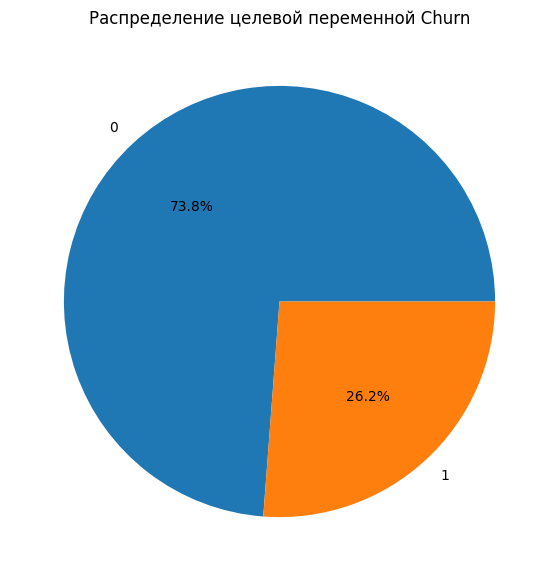

Соотношение минимального к максимальному классу: 0.36
Классы сбалансированы.


In [23]:
# 3. Анализ целевой переменной
churn_counts = data[target_col].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%')
plt.title(f'Распределение целевой переменной {target_col}')
plt.show()

# Проверка на несбалансированность классов
imbalance_ratio = churn_counts.min() / churn_counts.max()
print(f'Соотношение минимального к максимальному классу: {imbalance_ratio:.2f}')

if imbalance_ratio < 0.2:
    print("Классы несбалансированы.")
else:
    print("Классы сбалансированы.")

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# ничего не будет делать

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [26]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

In [28]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data.drop([target_col], axis=1), data[target_col], test_size=0.3, random_state=42)

# Преобразования для числовых и категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ]
)

# Создание пайплайна с логистической регрессией
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

# Использование GridSearchCV для подбора гиперпараметра C
param_grid = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv=5, refit=True)

# Обучение модели
grid_search.fit(X_train, y_train)

# Предсказание на тестовой выборке и оценка качества модели
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Лучший параметр C: {grid_search.best_params_}')
print(f'ROC-AUC на тестовой выборке: {roc_auc:.4f}')


Лучший параметр C: {'logisticregression__C': 10}
ROC-AUC на тестовой выборке: 0.7004


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучший параметр C: 10   
ROC-AUC на тестовой выборке: 0.7004

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [32]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [33]:
from catboost import CatBoostClassifier, Pool

In [34]:
# Разделение данных на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(data.drop([target_col], axis=1), data[target_col], test_size=0.3, random_state=42)

# Создание пула данных для CatBoost
train_pool = Pool(X_train, y_train, cat_features=cat_cols)
valid_pool = Pool(X_valid, y_valid, cat_features=cat_cols)

# 1. Обучение модели CatBoost с параметрами по умолчанию
model = CatBoostClassifier(eval_metric='AUC', random_seed=42, verbose=100)
model.fit(train_pool, eval_set=valid_pool)

# Предсказание на валидационной выборке
y_pred = model.predict_proba(X_valid)[:, 1]  # Получаем вероятности для класса 1
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC-AUC с параметрами по умолчанию: {roc_auc:.4f}')

# 2. Тестирование разных параметров количества деревьев и learning_rate
best_auc = 0
best_params = {}

for n_trees in [100, 200, 500]:
    for lr in [0.1, 0.01, 0.001]:
        model = CatBoostClassifier(n_estimators=n_trees, learning_rate=lr, eval_metric='AUC', random_seed=42, verbose=100)
        model.fit(train_pool, eval_set=valid_pool)

        y_pred = model.predict_proba(X_valid)[:, 1]
        roc_auc = roc_auc_score(y_valid, y_pred)

        print(f'Количество деревьев: {n_trees}, Learning rate: {lr}, ROC-AUC: {roc_auc:.4f}')

        if roc_auc > best_auc:
            best_auc = roc_auc
            best_params = {'n_estimators': n_trees, 'learning_rate': lr}

print(f'Лучшая комбинация параметров: {best_params}, ROC-AUC: {best_auc:.4f}')

Learning rate set to 0.043769
0:	test: 0.7754821	best: 0.7754821 (0)	total: 89.2ms	remaining: 1m 29s
100:	test: 0.8331759	best: 0.8332731 (99)	total: 3.25s	remaining: 28.9s
200:	test: 0.8338933	best: 0.8340698 (168)	total: 6.05s	remaining: 24s
300:	test: 0.8316660	best: 0.8340698 (168)	total: 10.7s	remaining: 24.8s
400:	test: 0.8292432	best: 0.8340698 (168)	total: 14.4s	remaining: 21.5s
500:	test: 0.8272610	best: 0.8340698 (168)	total: 17.6s	remaining: 17.6s
600:	test: 0.8265362	best: 0.8340698 (168)	total: 21.4s	remaining: 14.2s
700:	test: 0.8244716	best: 0.8340698 (168)	total: 24.2s	remaining: 10.3s
800:	test: 0.8233410	best: 0.8340698 (168)	total: 25.6s	remaining: 6.36s
900:	test: 0.8217181	best: 0.8340698 (168)	total: 27s	remaining: 2.97s
999:	test: 0.8203614	best: 0.8340698 (168)	total: 28.5s	remaining: 0us

bestTest = 0.8340697866
bestIteration = 168

Shrink model to first 169 iterations.
ROC-AUC с параметрами по умолчанию: 0.8341
0:	test: 0.7729188	best: 0.7729188 (0)	total: 4.8

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Лучшая комбинация параметров: 'n_estimators': 500, 'learning_rate': 0.01  
ROC-AUC: 0.8354

# Предсказания

In [36]:
all_pool  = Pool(data.drop([target_col], axis=1), data[target_col], cat_features=cat_cols)

In [39]:
best_model = CatBoostClassifier(n_estimators=500, learning_rate=0.01, random_seed=42)
model.fit(all_pool)

0:	total: 43.2ms	remaining: 21.6s
100:	total: 1.46s	remaining: 5.78s
200:	total: 2.83s	remaining: 4.21s
300:	total: 4.21s	remaining: 2.78s
400:	total: 5.63s	remaining: 1.39s
499:	total: 7.04s	remaining: 0us


In [42]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.